# NLP & Sentiment analysis on user reviews for the following Android Phones from GSM Arena Website

### By: Soorya Parthiban

## Importing the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the dataset

In [2]:
df_pixel5 = pd.read_csv("../input/5-android-phones-user-reviews/GooglePixel5_reviews.csv")
df_oneplus9 = pd.read_csv("../input/5-android-phones-user-reviews/OnePlus9Pro_reviews.csv")
df_oppoFindX3 = pd.read_csv("../input/5-android-phones-user-reviews/OppoFindX3Pro_reviews.csv")
df_samsungGalaxyS21 = pd.read_csv("../input/5-android-phones-user-reviews/SamsungGalaxyS21Ultra_reviews.csv")
df_Mi11 = pd.read_csv("../input/5-android-phones-user-reviews/XiaomiMi11_reviews.csv")

### Exploring Pixel 5 Reviews

In [3]:
df_pixel5.head()

,userComments
0,"Hi all, I want to buy a pixel 5 but never used..."
1,"Mm, 20 May 2021Because the storage bus lane ca..."
2,"--voltaire9, 26 Apr 2021What on earth does hav..."
3,"Third, 13 Jan 2021What does it mean on OS/ Sof..."
4,"Anonymous, 22 Apr 2021For the guys wondering h..."


In [4]:
df_pixel5.tail()

,userComments
206,"Shriker, 25 Oct 2020""The level of resolved det..."
207,"I'm in love with this device. I want to buy, b..."
208,For the first time I skip new Pixels having ha...
209,"""The level of resolved detail is generally goo..."
210,Pixel 4 = better design


In [5]:
df_pixel5.isnull().sum()

userComments    0
dtype: int64

In [6]:
print(len(df_pixel5))

211


## Creating the Word Cloud function

In [7]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

## NLP & Sentiment analysis on Google Pixel 5 Reviews

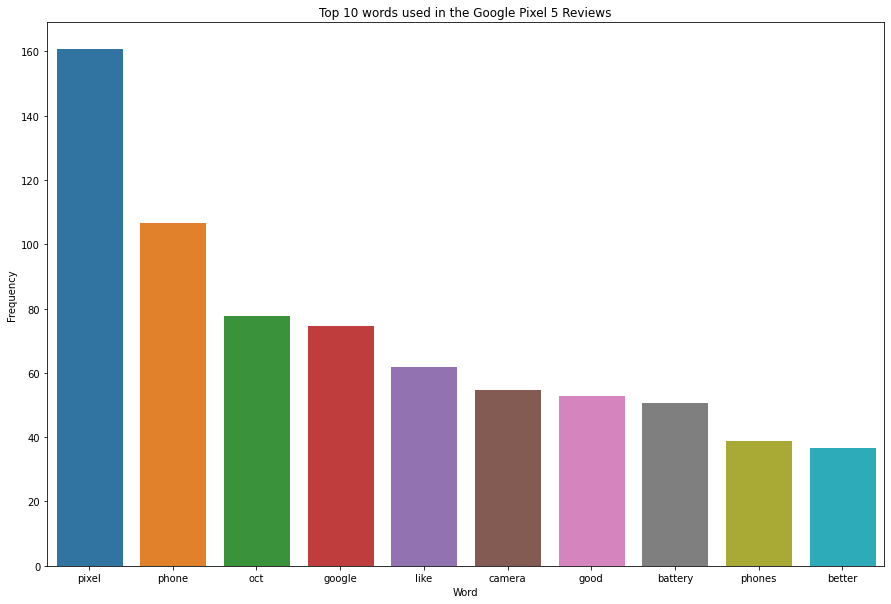

In [8]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100

a = df_pixel5['userComments'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
pixel5_cleaned = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(pixel5_cleaned)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(15,10))
plt.title("Top 10 words used in the Google Pixel 5 Reviews")
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(10))


### Google Pixel 5 Word Cloud

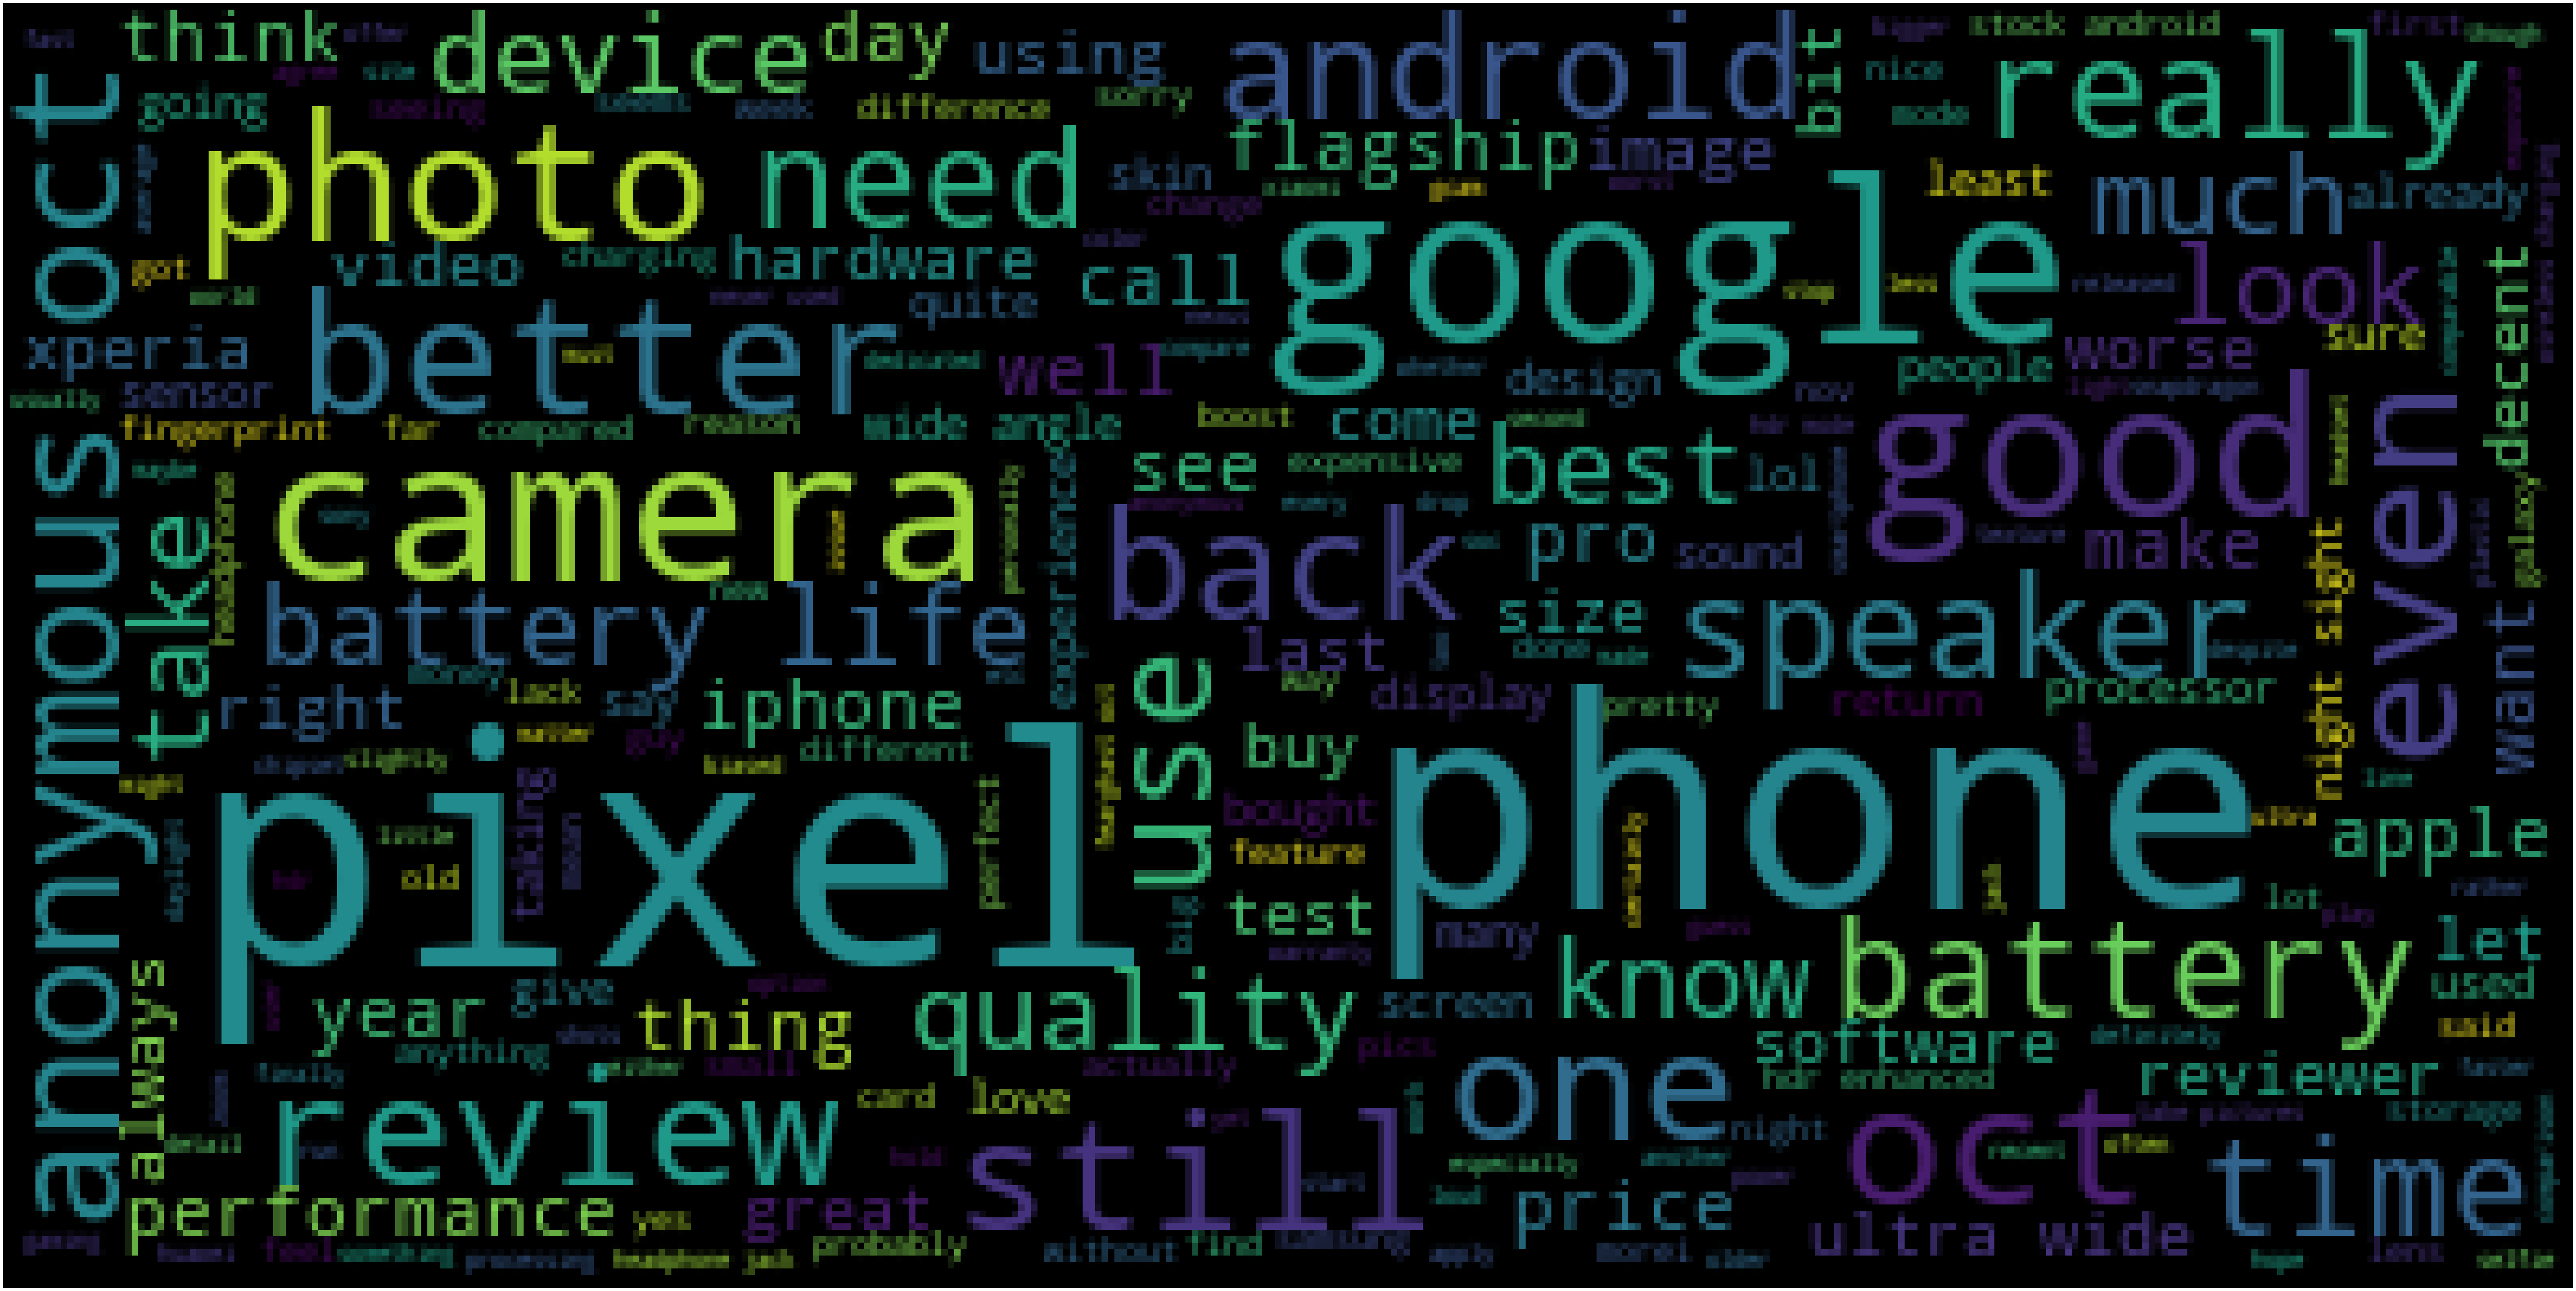

In [9]:
wc(pixel5_cleaned,'black','Common Words' )

### Google Pixel 5 Sentiment Analysis

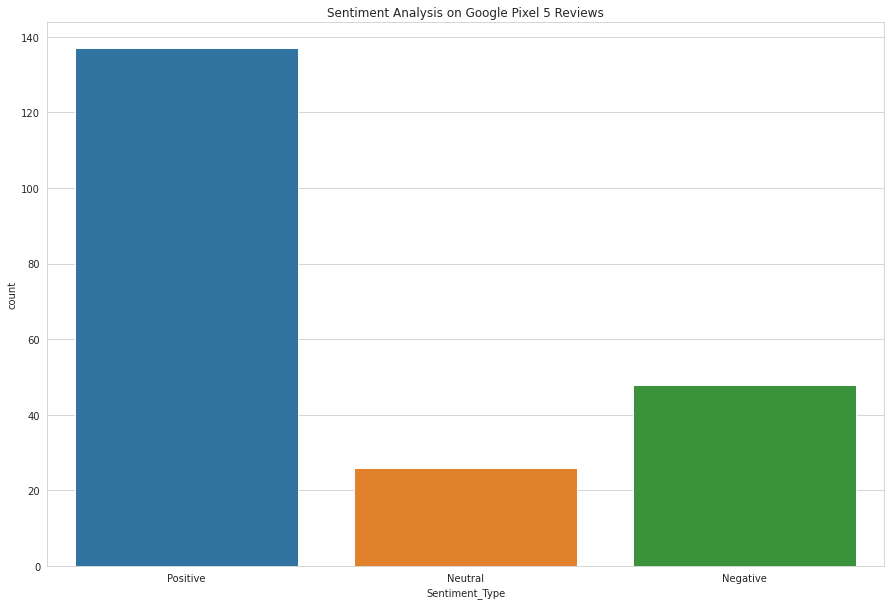

In [10]:
from textblob import TextBlob

bloblist_title = list()

df_pixel5_str = df_pixel5['userComments']
for row in df_pixel5_str:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_pixel5_str_polarity = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(df_pixel5_str_polarity):
    if df_pixel5_str_polarity['sentiment'] > 0:
        val = "Positive"
    elif df_pixel5_str_polarity['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_pixel5_str_polarity['Sentiment_Type'] = df_pixel5_str_polarity.apply(f_title, axis=1)

plt.figure(figsize=(15,10))
plt.title("Sentiment Analysis on Google Pixel 5 Reviews")
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_pixel5_str_polarity)


## NLP & Sentiment analysis on Oneplus 9 Reviews

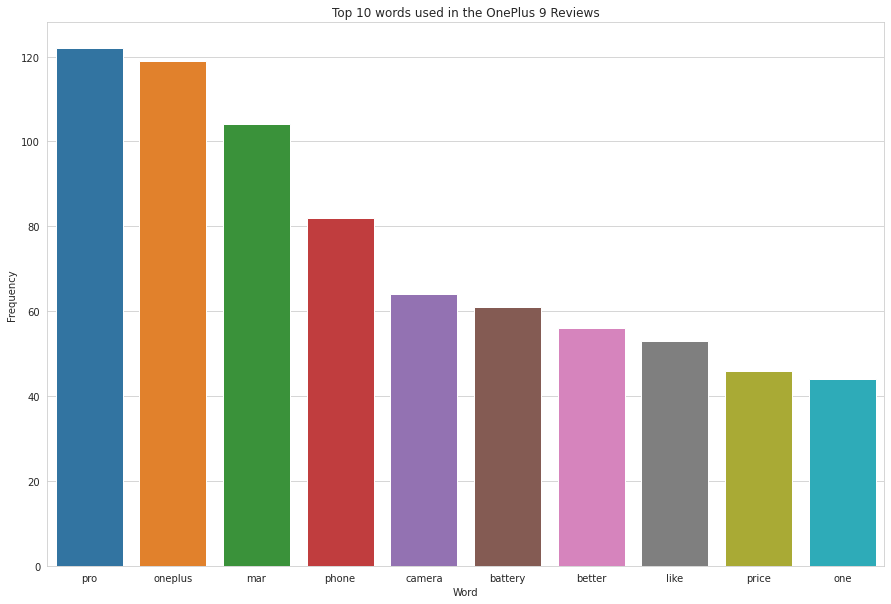

In [11]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100

a = df_oneplus9['userComments'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
oneplus9_cleaned = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(oneplus9_cleaned)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(15,10))
plt.title("Top 10 words used in the OnePlus 9 Reviews")
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(10))


### OnePlus 9 Word Cloud

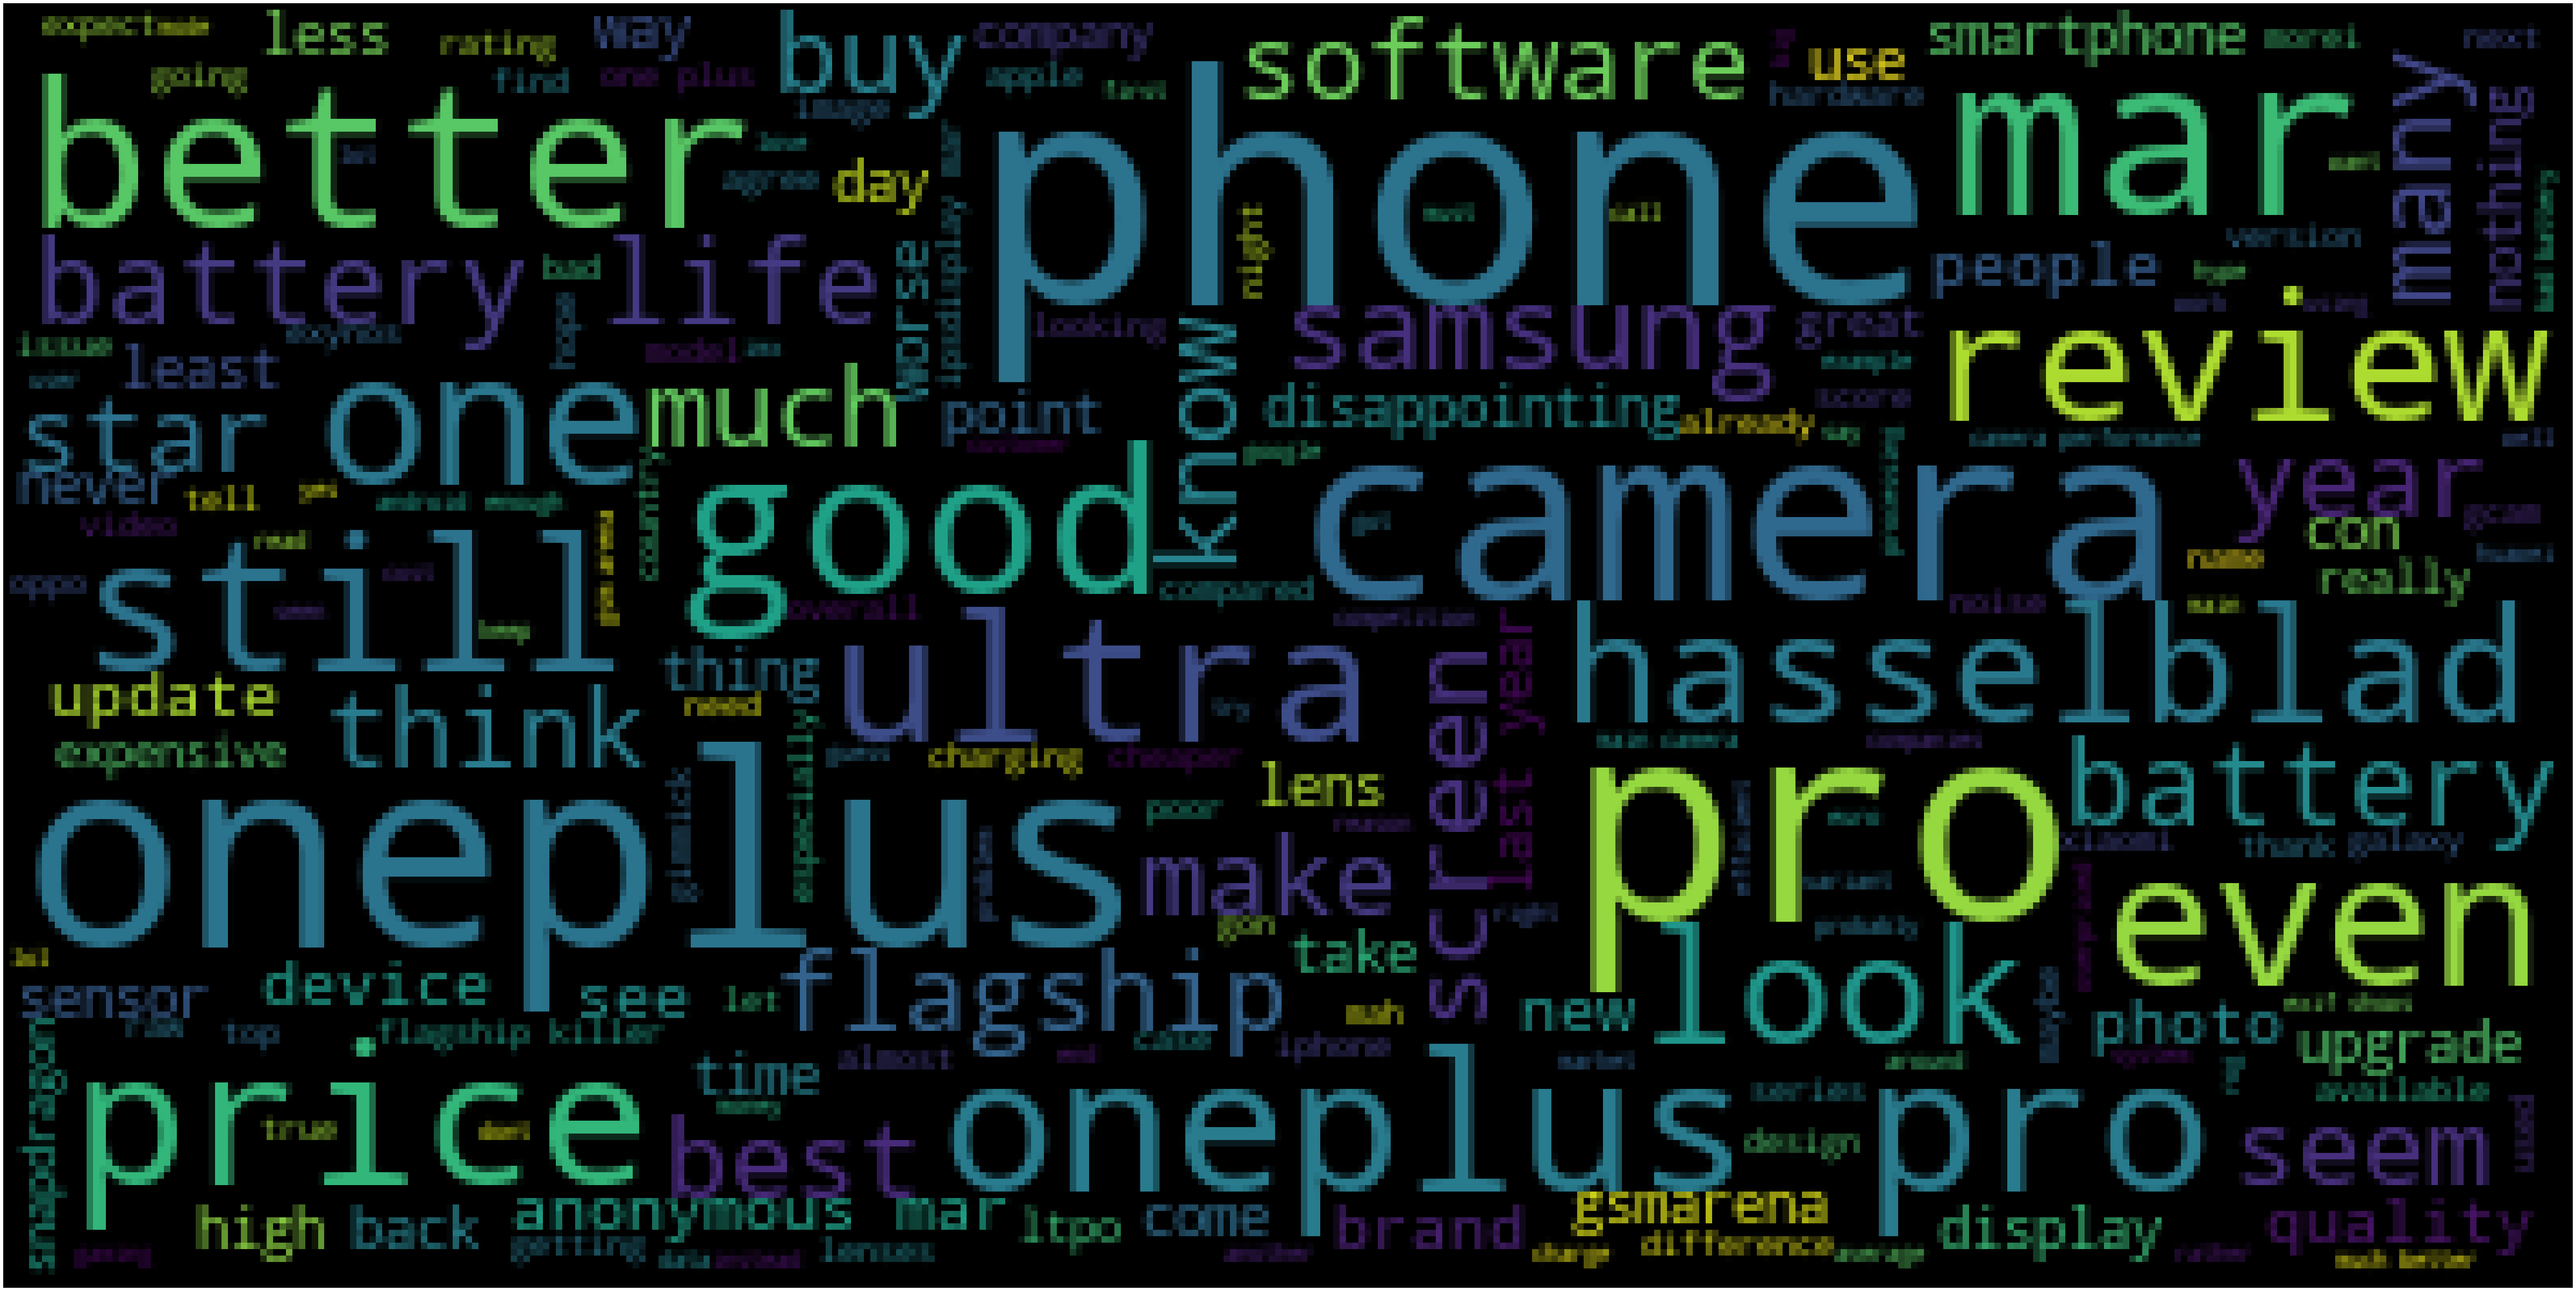

In [12]:
wc(oneplus9_cleaned,'black','Common Words' )

### OnePlus 9 Sentiment Analysis

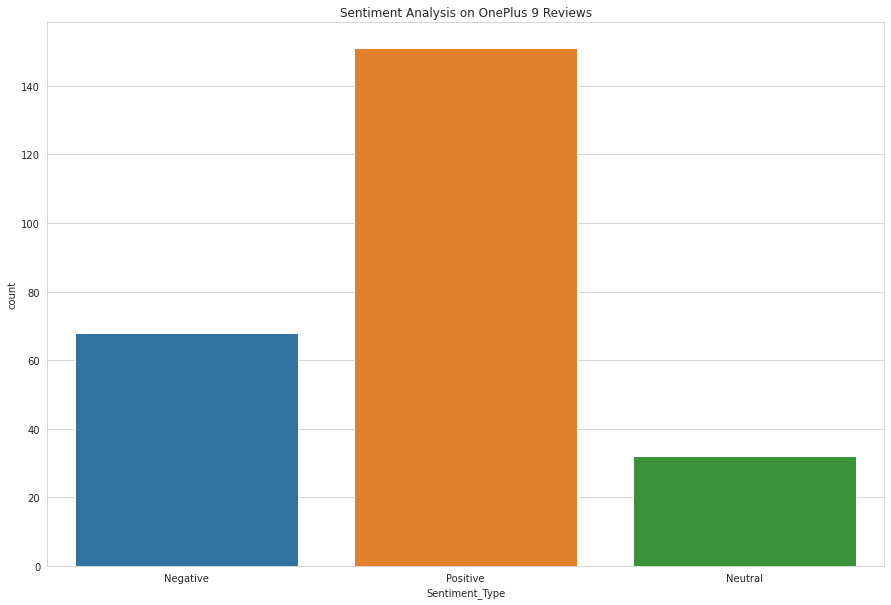

In [13]:
from textblob import TextBlob

bloblist_title = list()

df_oneplus9_str = df_oneplus9['userComments']
for row in df_oneplus9_str:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_oneplus9_str_polarity = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(df_oneplus9_str_polarity):
    if df_oneplus9_str_polarity['sentiment'] > 0:
        val = "Positive"
    elif df_oneplus9_str_polarity['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_oneplus9_str_polarity['Sentiment_Type'] = df_oneplus9_str_polarity.apply(f_title, axis=1)

plt.figure(figsize=(15,10))
plt.title("Sentiment Analysis on OnePlus 9 Reviews")
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_oneplus9_str_polarity)


## NLP & Sentiment analysis on Oppo Find X3 Reviews

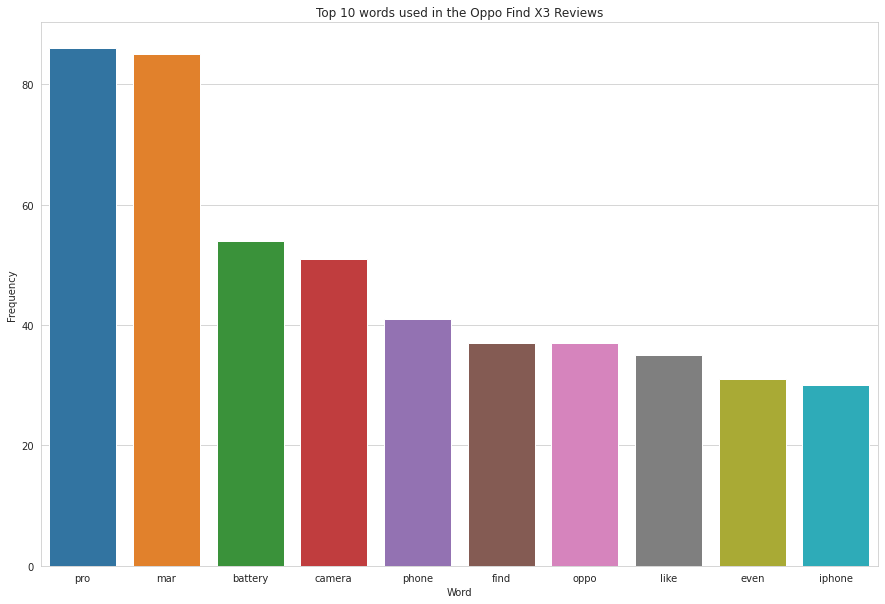

In [14]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100

a = df_oppoFindX3['userComments'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
oppoFindX3_cleaned = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(oppoFindX3_cleaned)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(15,10))
plt.title("Top 10 words used in the Oppo Find X3 Reviews")
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(10))


### Oppo Find X3 Word Cloud

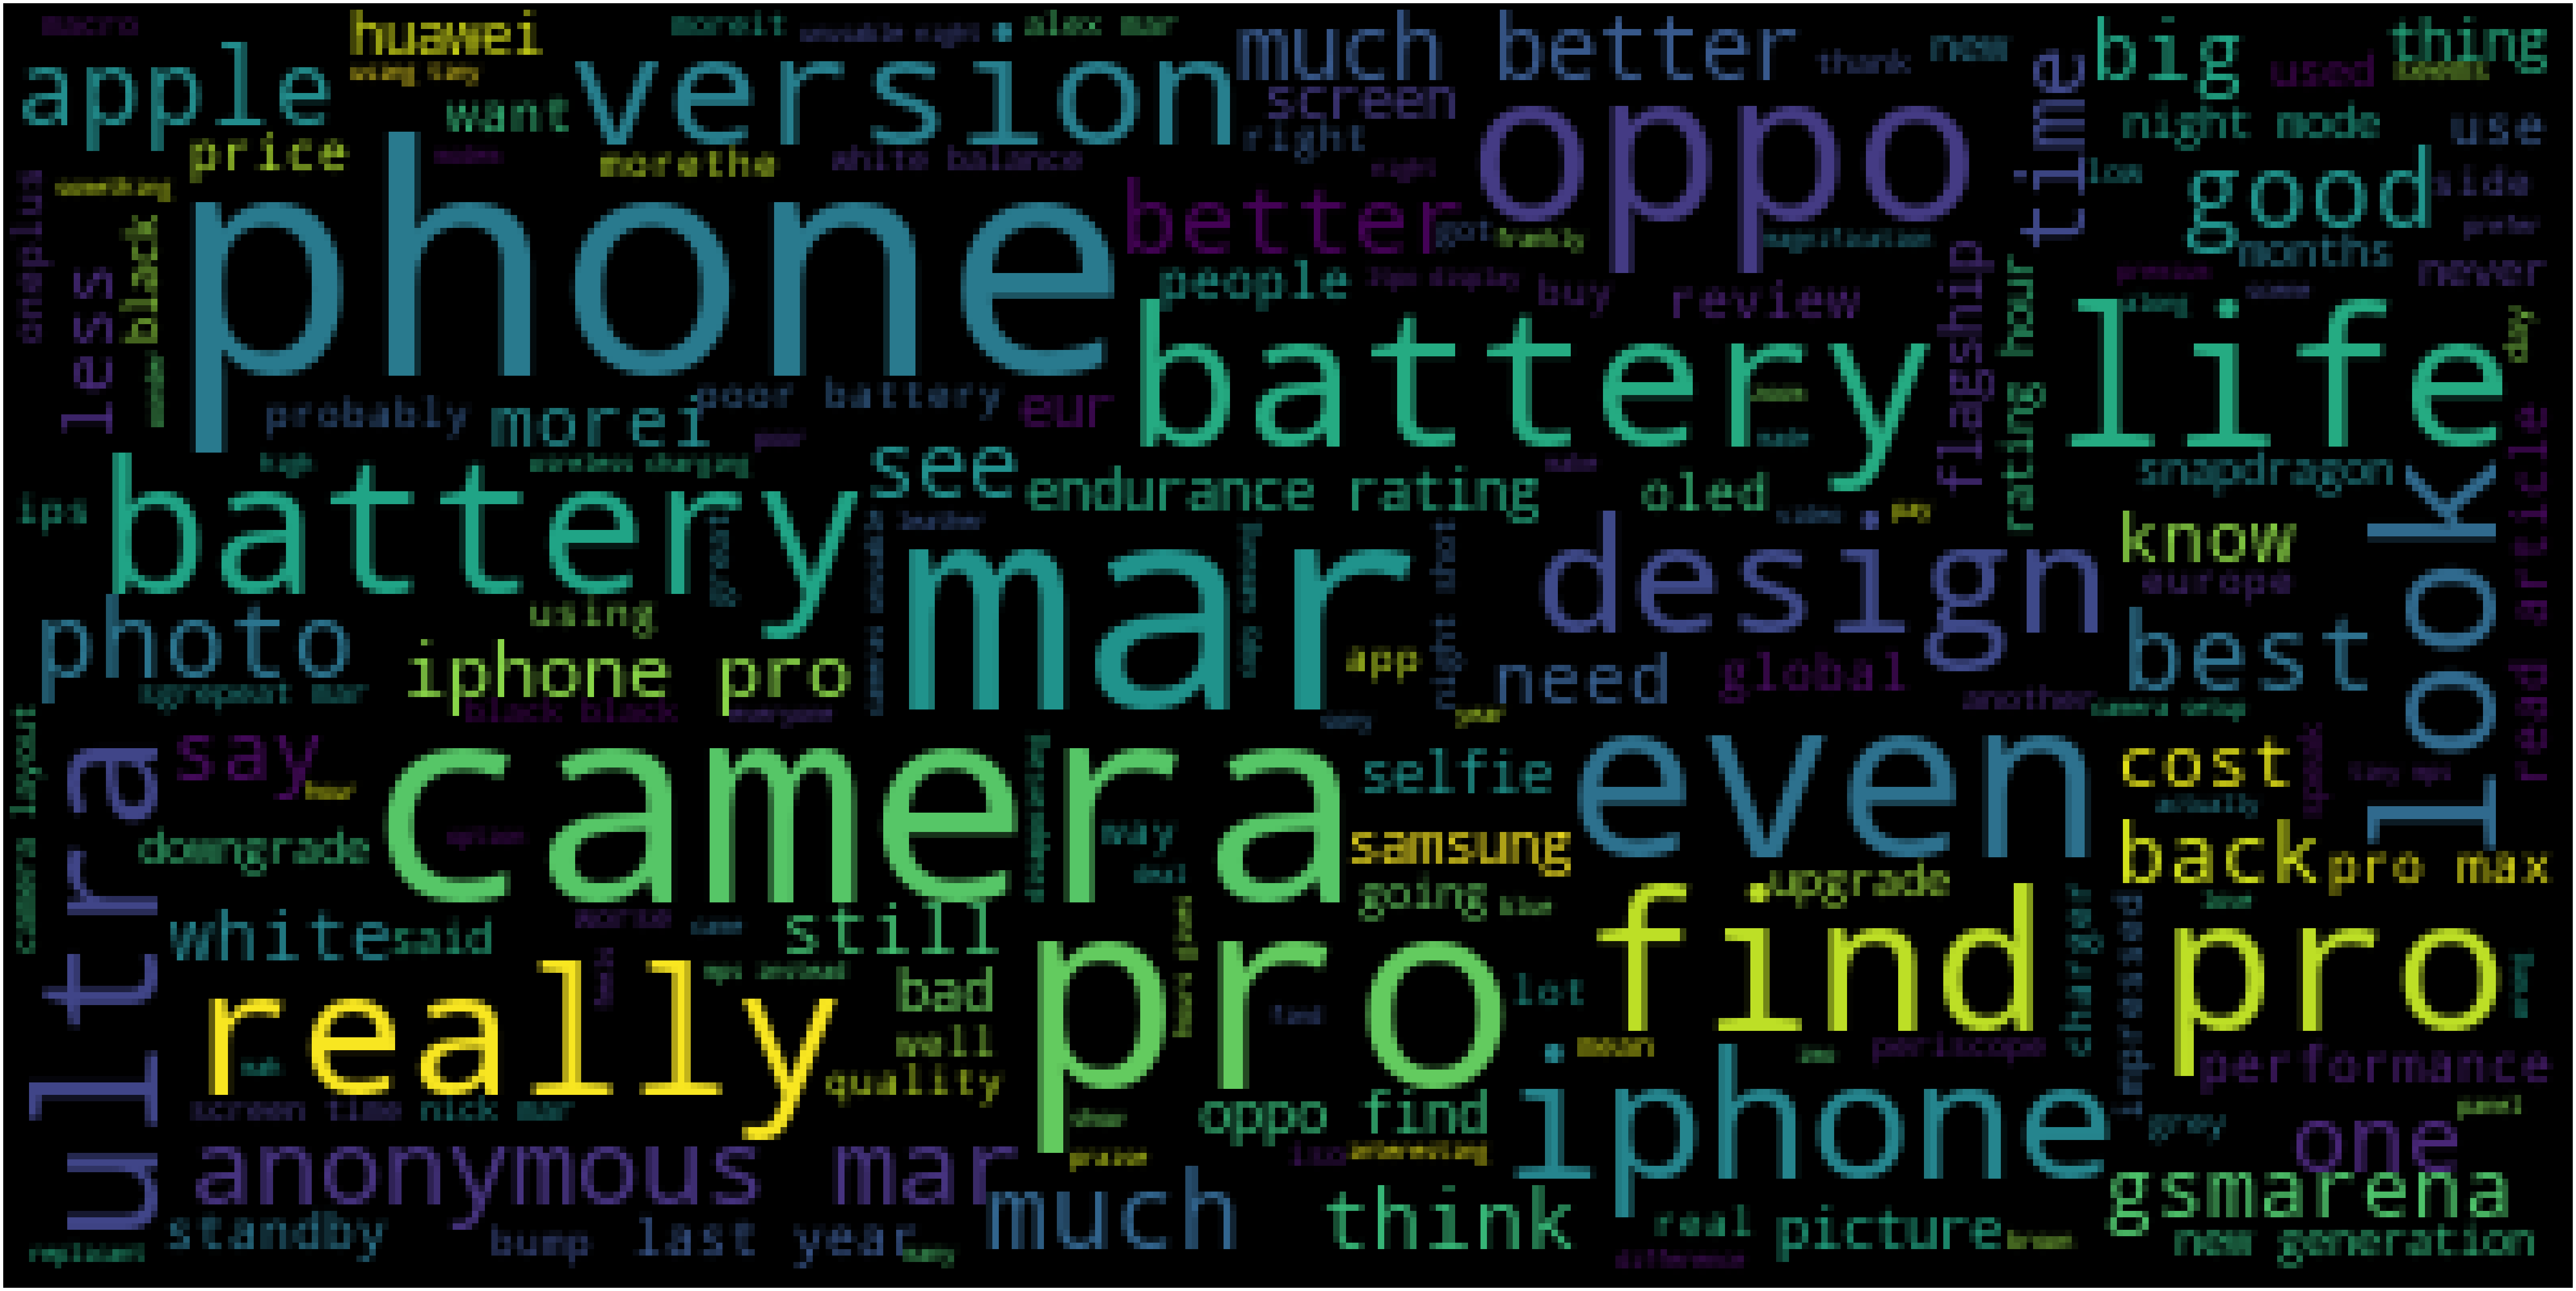

In [15]:
wc(oppoFindX3_cleaned,'black','Common Words' )

### Oppo Find X3 Sentiment Analysis

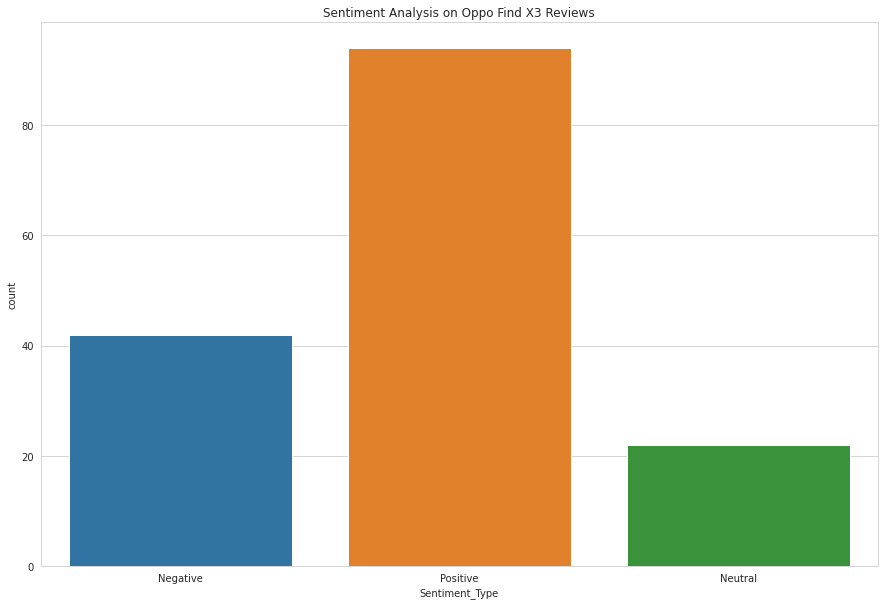

In [16]:
from textblob import TextBlob

bloblist_title = list()

df_oppo_str = df_oppoFindX3['userComments']
for row in df_oppo_str:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_oppo_str_polarity = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(df_oppo_str_polarity):
    if df_oppo_str_polarity['sentiment'] > 0:
        val = "Positive"
    elif df_oppo_str_polarity['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_oppo_str_polarity['Sentiment_Type'] = df_oppo_str_polarity.apply(f_title, axis=1)

plt.figure(figsize=(15,10))
plt.title("Sentiment Analysis on Oppo Find X3 Reviews")
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_oppo_str_polarity)


## NLP & Sentiment analysis on Samsung Galaxy S21 Reviews

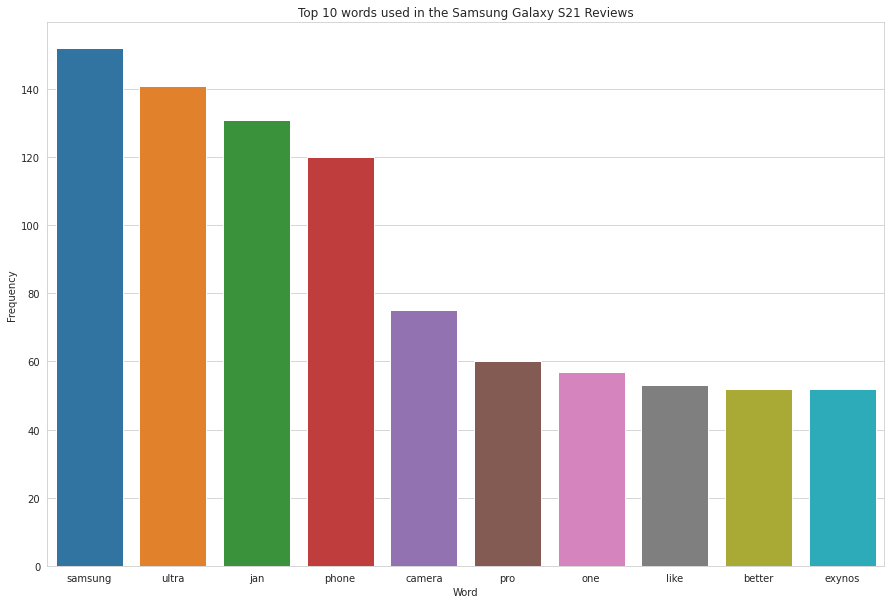

In [17]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100

a = df_samsungGalaxyS21['userComments'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
galaxys21_cleaned = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(galaxys21_cleaned)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(15,10))
plt.title("Top 10 words used in the Samsung Galaxy S21 Reviews")
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(10))


### Samsung Galaxy S21 Word Cloud

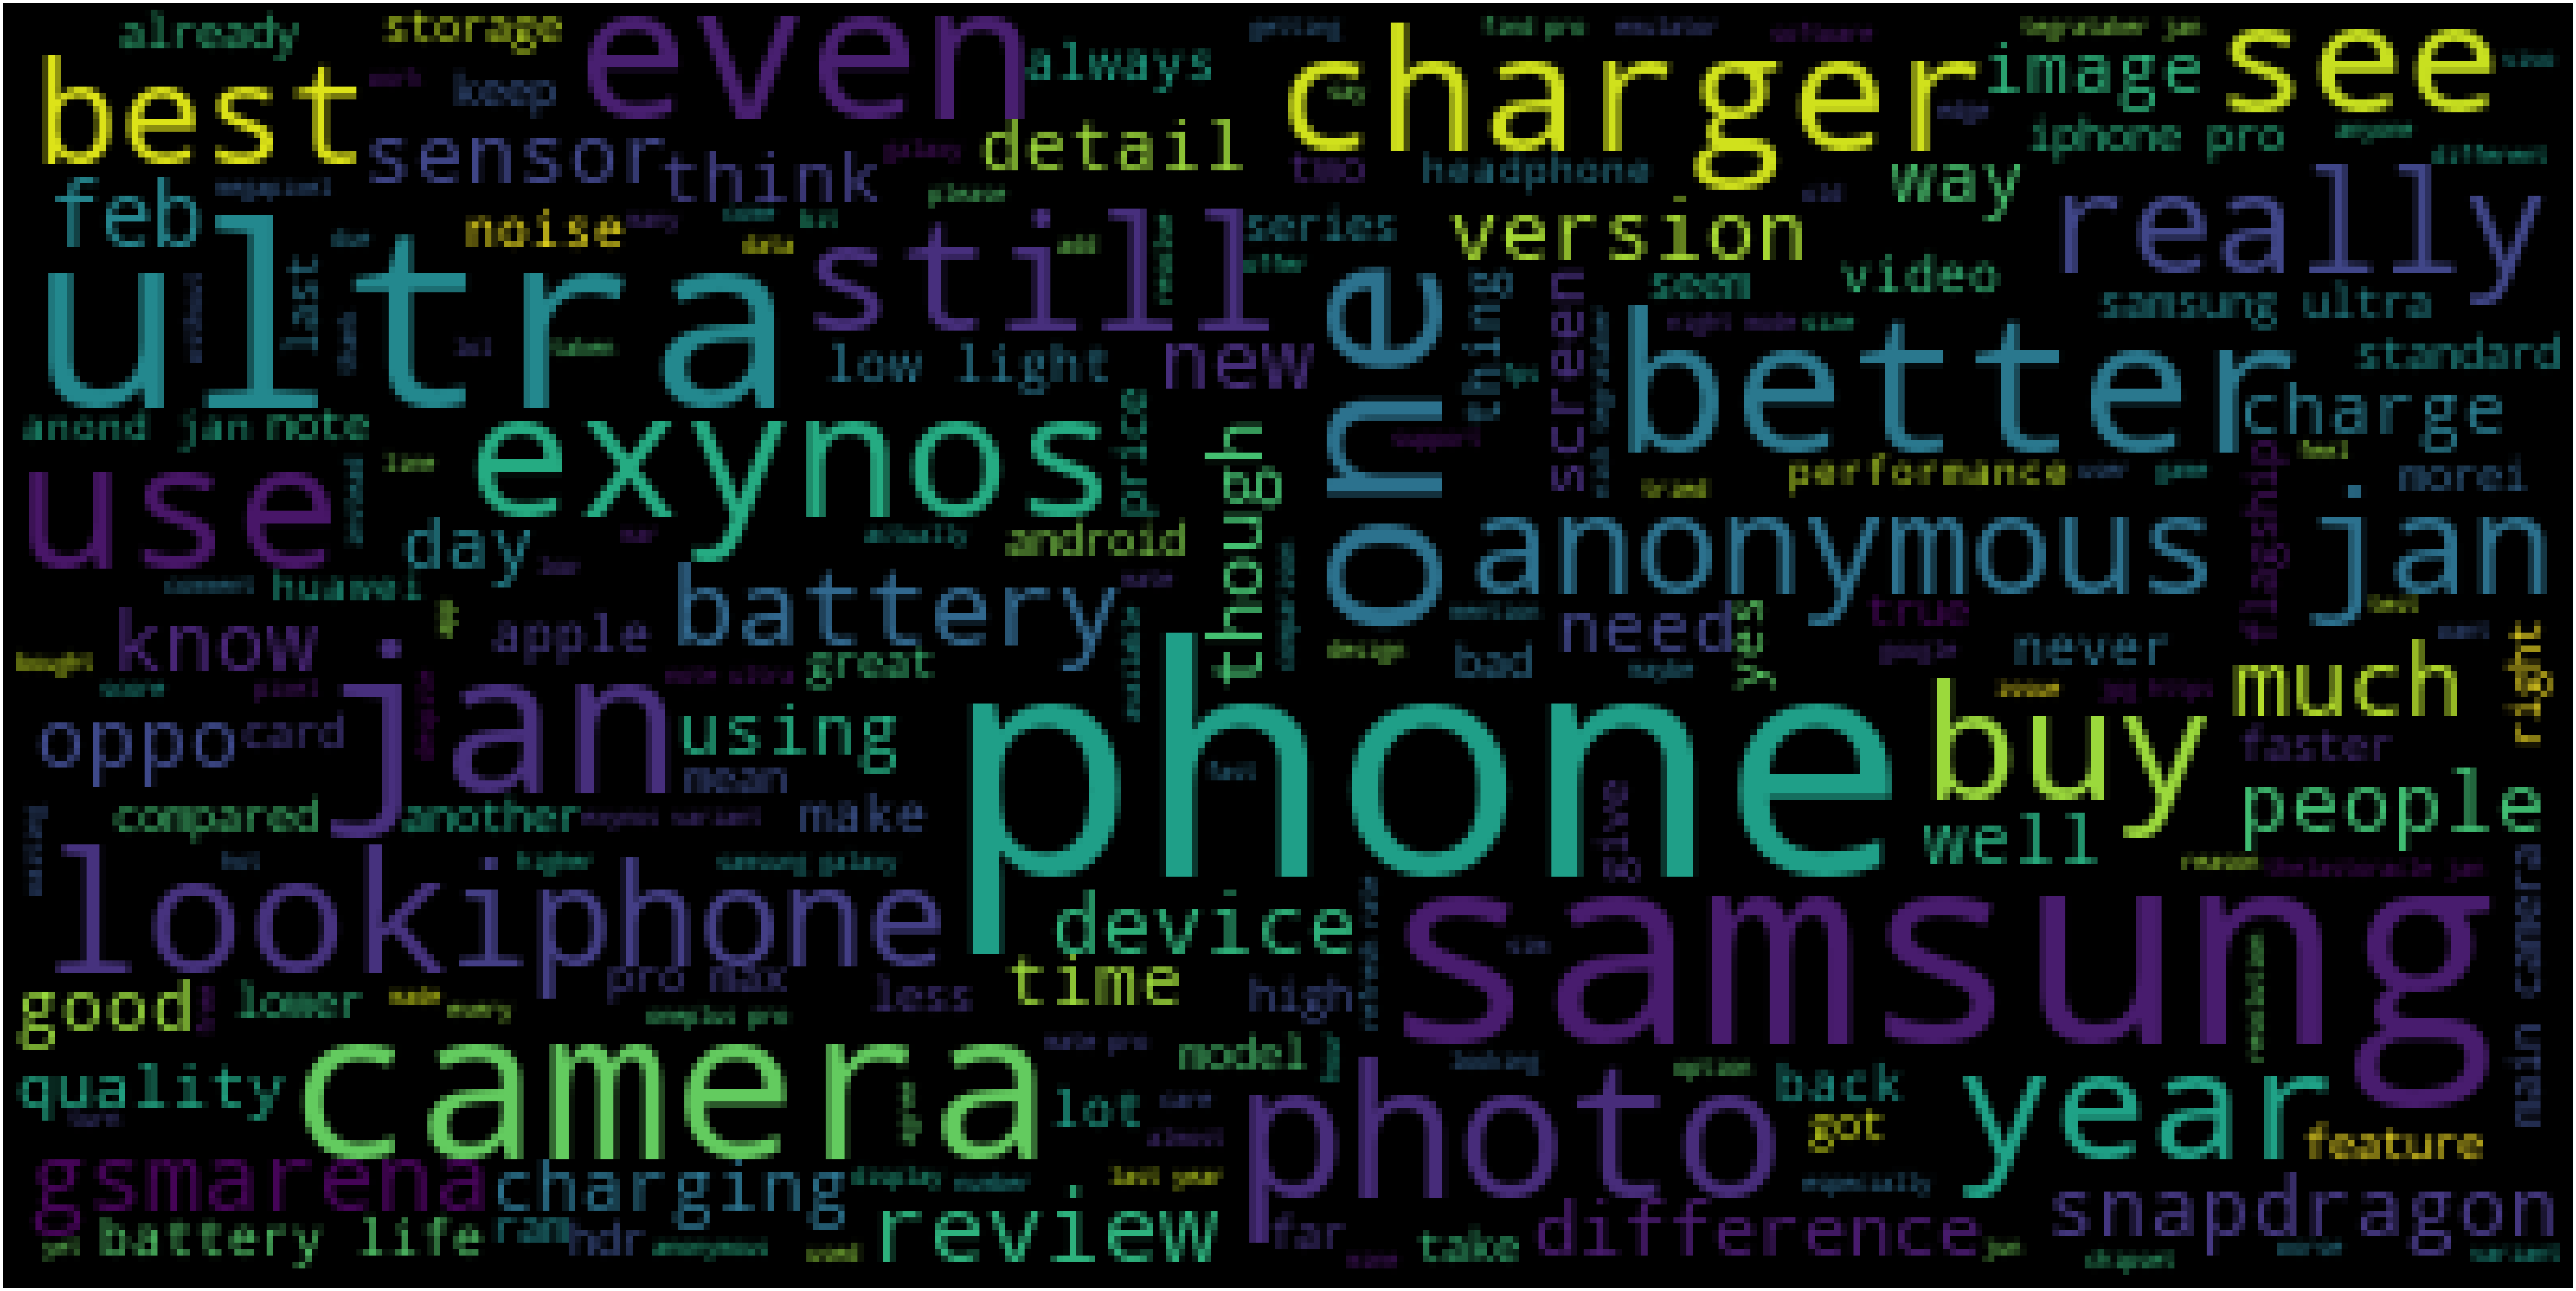

In [18]:
wc(galaxys21_cleaned,'black','Common Words' )

### Samsung Galaxy S21 Sentiment Analysis

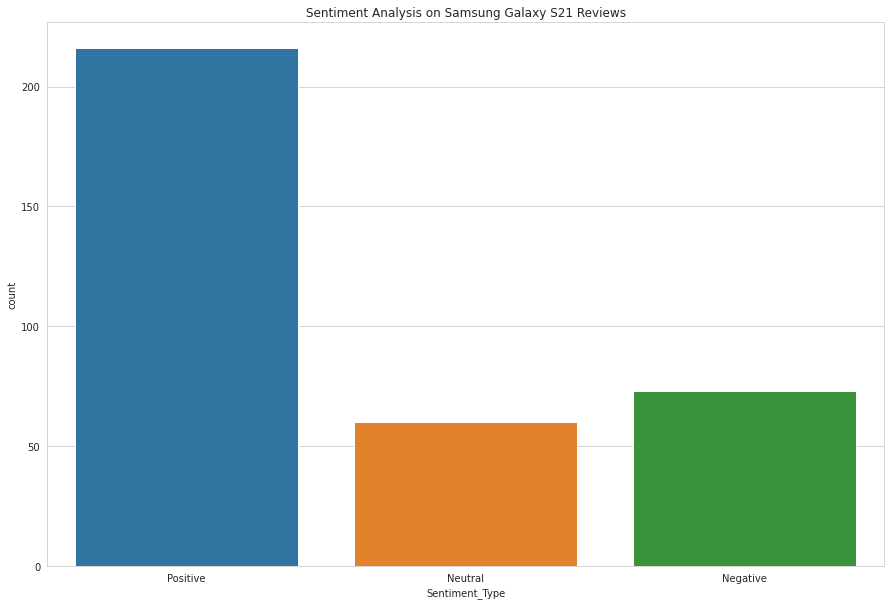

In [19]:
from textblob import TextBlob

bloblist_title = list()

df_s21_str = df_samsungGalaxyS21['userComments']
for row in df_s21_str:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_s21_str_polarity = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(df_s21_str_polarity):
    if df_s21_str_polarity['sentiment'] > 0:
        val = "Positive"
    elif df_s21_str_polarity['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_s21_str_polarity['Sentiment_Type'] = df_s21_str_polarity.apply(f_title, axis=1)

plt.figure(figsize=(15,10))
plt.title("Sentiment Analysis on Samsung Galaxy S21 Reviews")
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_s21_str_polarity)


## NLP & Sentiment analysis on Xiaomi Mi 11 Reviews

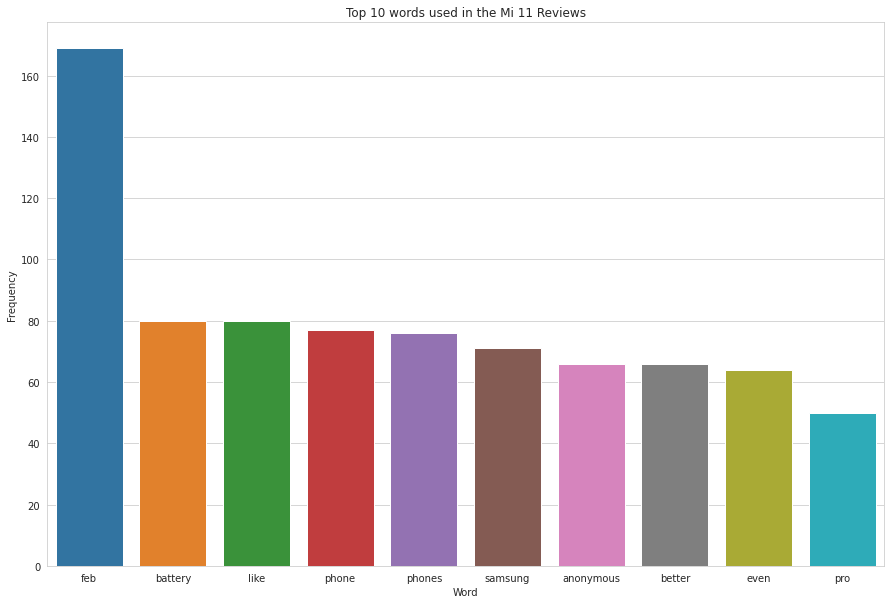

In [20]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100

a = df_Mi11['userComments'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
mi11_cleaned = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(mi11_cleaned)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(15,10))
plt.title("Top 10 words used in the Mi 11 Reviews")
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(10))


### Mi 11 Word Cloud

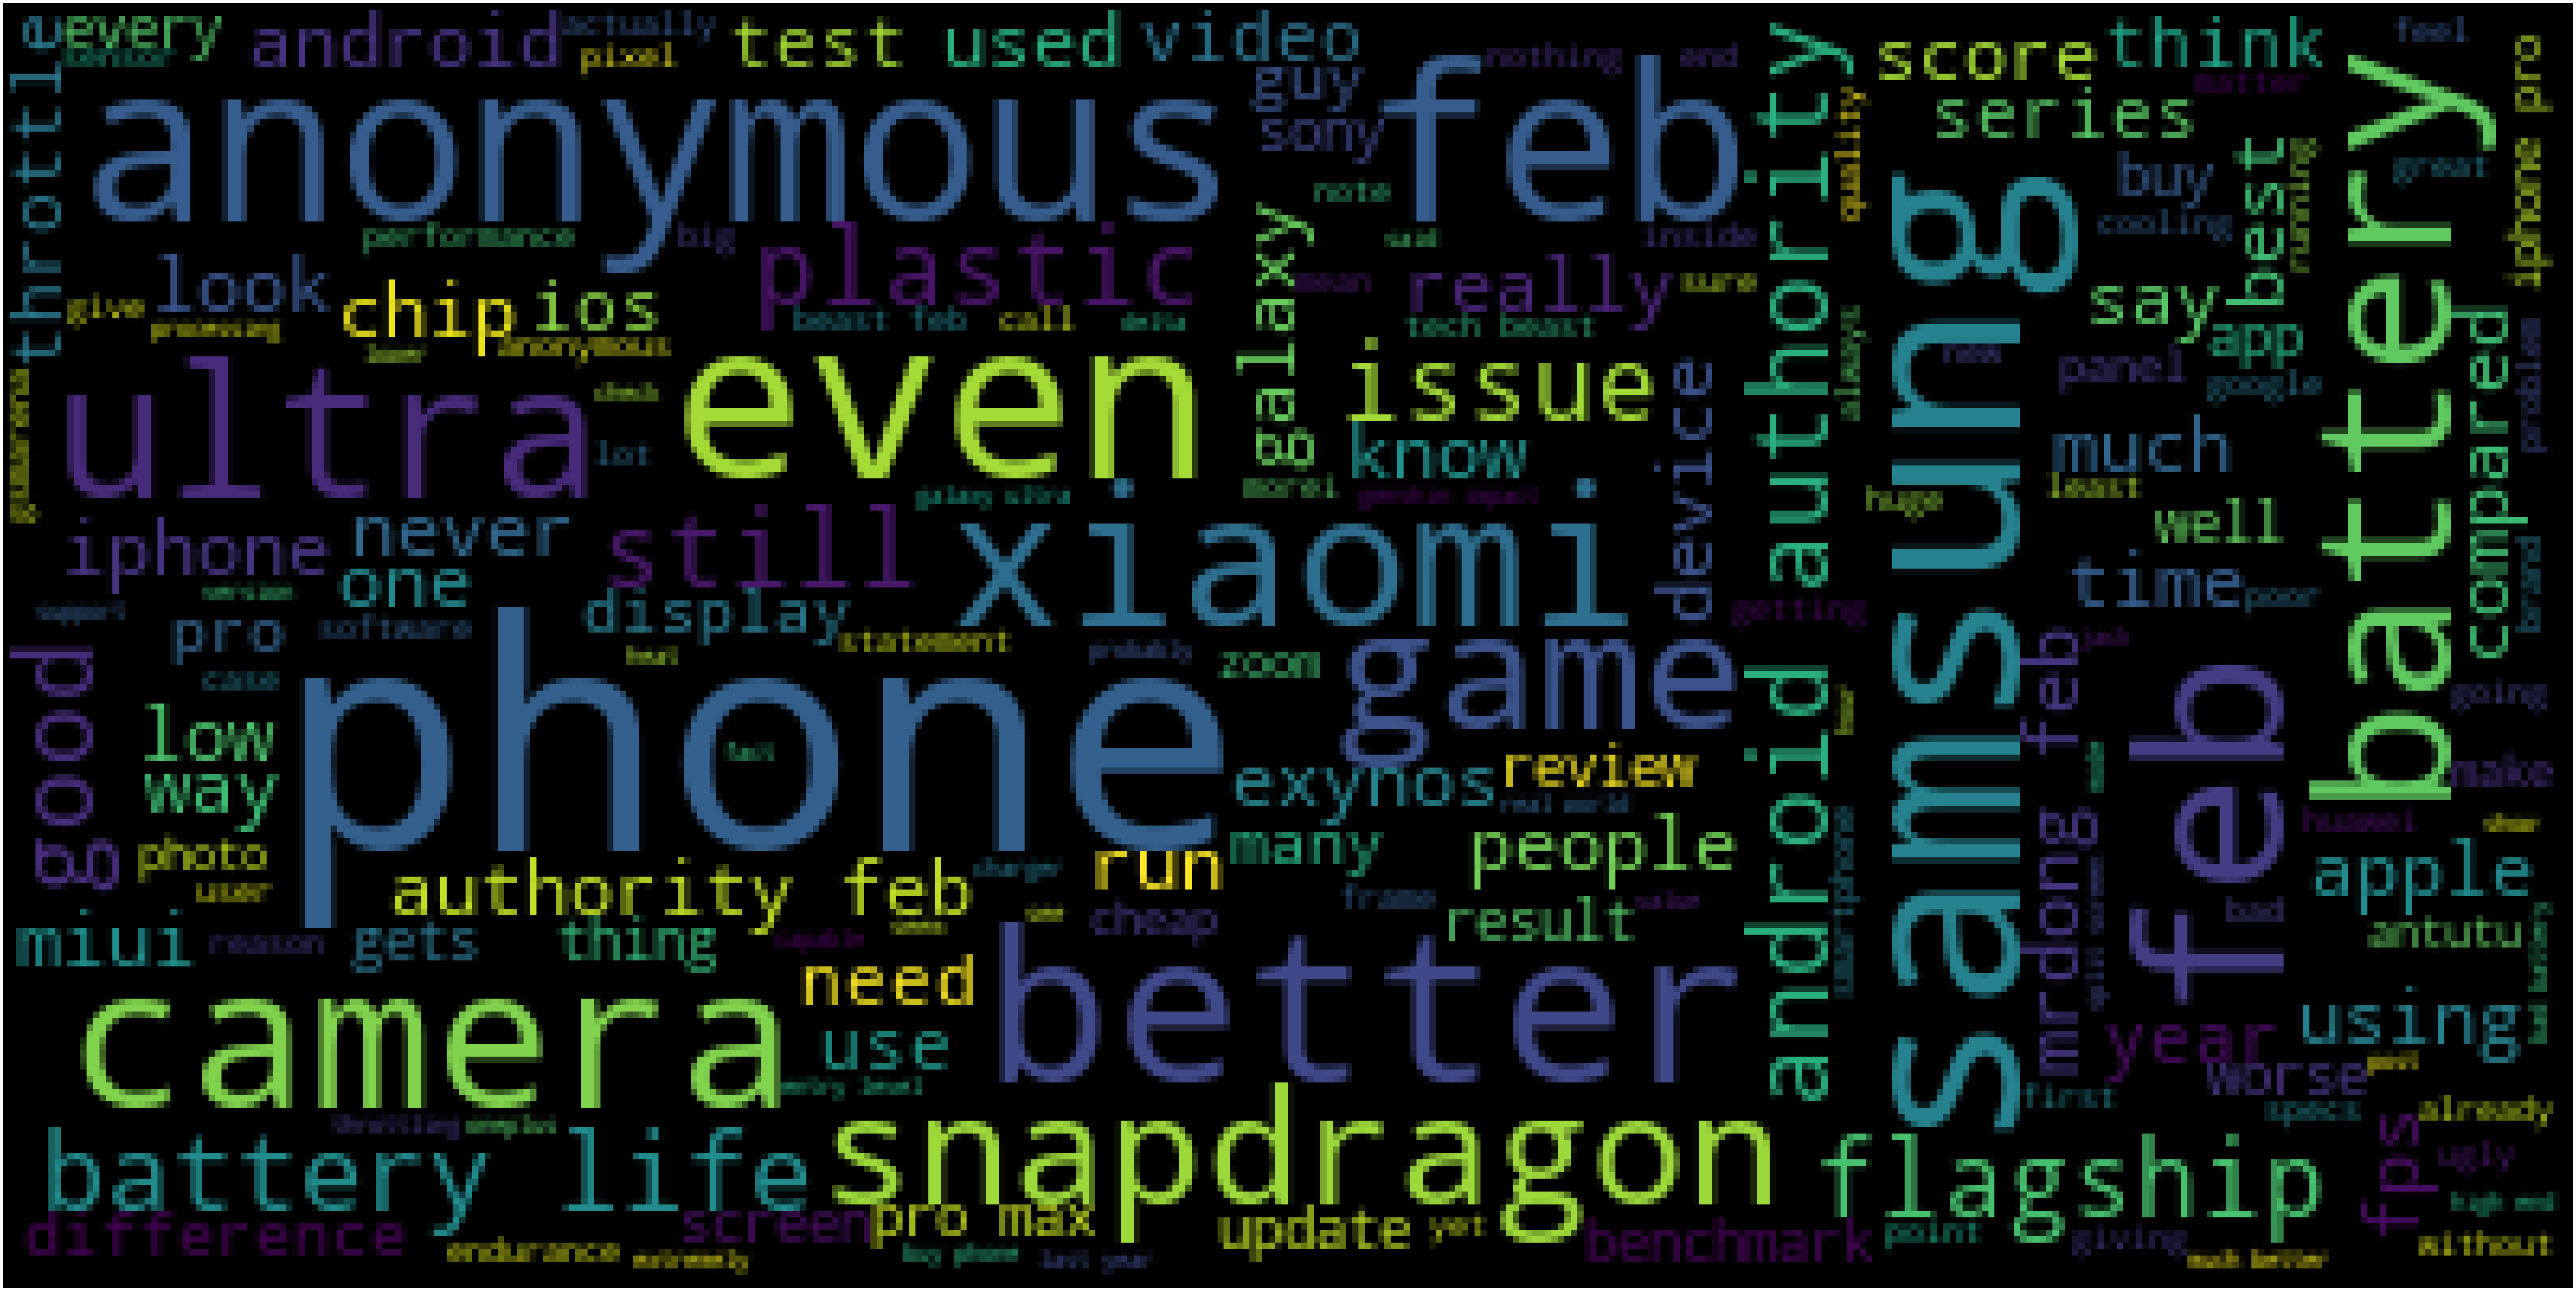

In [21]:
wc(mi11_cleaned,'black','Common Words' )

### Mi 11 Sentiment Analysis

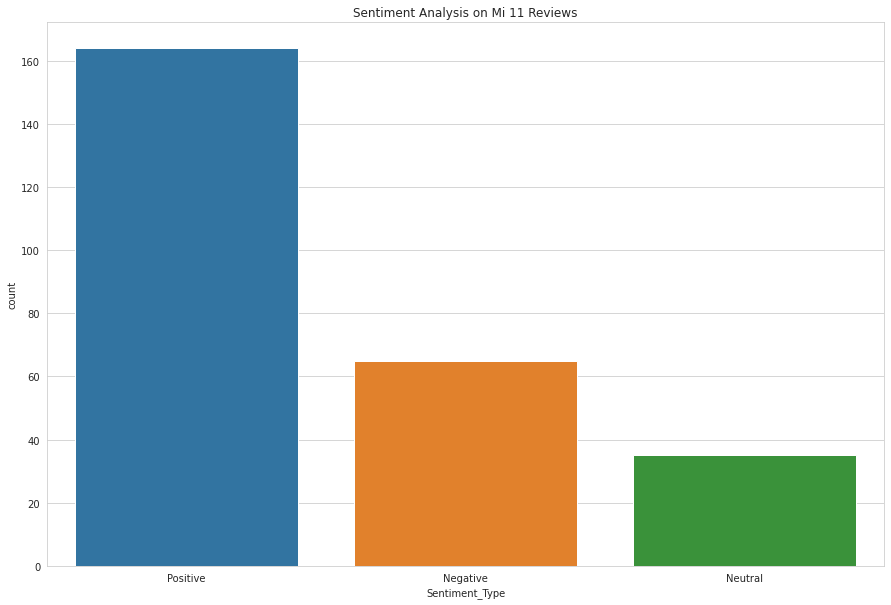

In [22]:
from textblob import TextBlob

bloblist_title = list()

df_mi11_str = df_Mi11['userComments']
for row in df_mi11_str:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_mi11_str_polarity = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(df_mi11_str_polarity):
    if df_mi11_str_polarity['sentiment'] > 0:
        val = "Positive"
    elif df_mi11_str_polarity['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_mi11_str_polarity['Sentiment_Type'] = df_mi11_str_polarity.apply(f_title, axis=1)

plt.figure(figsize=(15,10))
plt.title("Sentiment Analysis on Mi 11 Reviews")
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_mi11_str_polarity)


# THE END